In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import re

In [2]:
#%matplotlib nbagg
import matplotlib as plt
import seaborn as sns

Load loans file

In [5]:
loan = pd.read_csv('loan.csv', low_memory=False)

FileNotFoundError: [Errno 2] File b'loan.csv' does not exist: b'loan.csv'

In [4]:
loan.head()

NameError: name 'loan' is not defined

In [38]:
pd.DataFrame(loan.dtypes).loc[lambda df: df[0].eq('object')]

,0
term,object
int_rate,object
grade,object
sub_grade,object
emp_title,object
emp_length,object
home_ownership,object
verification_status,object
issue_d,object
loan_status,object


Load data dictionary

In [39]:
loan_data_dict = pd.read_excel('Data_Dictionary.xlsx')
first_empty_row_ix = loan_data_dict.loc[loan_data_dict.isnull().all(axis=1)].index[0]
loan_data_dict = loan_data_dict.loc[range(first_empty_row_ix)]

Use the following if data dictionary spreadsheet is not available

In [40]:
# loan_data_dict = pd.DataFrame({'LoanStatNew': ['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'desc', 'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'max_bal_bc', 'member_id', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'policy_code', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'tax_liens', 'term', 'title', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_acc', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 'total_cu_tl', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 'url', 'verification_status', 'verified_status_joint', 'zip_code', ],
#               'Description': ['''The number of accounts on which the borrower is now delinquent.''', '''Number of trades opened in past 24 months.''', '''The state provided by the borrower in the loan application''', '''Balance to credit limit on all trades''', '''The self-reported annual income provided by the borrower during registration.''', '''The combined self-reported annual income provided by the co-borrowers during registration''', '''Indicates whether the loan is an individual application or a joint application with two co-borrowers''', '''Average current balance of all accounts''', '''Total open to buy on revolving bankcards.''', '''Ratio of total current balance to high credit/credit limit for all bankcard accounts.''', '''Number of charge-offs within 12 months''', '''post charge off collection fee''', '''Number of collections in 12 months excluding medical collections''', '''The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years''', '''The past-due amount owed for the accounts on which the borrower is now delinquent.''', '''Loan description provided by the borrower''', '''A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.''', '''A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income''', '''The month the borrower's earliest reported credit line was opened''', '''Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. ''', '''The job title supplied by the Borrower when applying for the loan.*''', '''The upper boundary range the borrower’s FICO at loan origination belongs to.''', '''The lower boundary range the borrower’s FICO at loan origination belongs to.''', '''The total amount committed to that loan at that point in time.''', '''The total amount committed by investors for that loan at that point in time.''', '''LC assigned loan grade''', '''The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.''', '''A unique LC assigned ID for the loan listing.''', '''Ratio of total current balance to high credit/credit limit on all install acct''', '''The initial listing status of the loan. Possible values are – W, F''', '''Number of personal finance inquiries''', '''Number of credit inquiries in past 12 months''', '''The number of inquiries in past 6 months (excluding auto and mortgage inquiries)''', '''The monthly payment owed by the borrower if the loan originates.''', '''Interest Rate on the loan''', '''The month which the loan was funded''', '''The most recent month LC pulled credit for this loan''', '''The upper boundary range the borrower’s last FICO pulled belongs to.''', '''The lower boundary range the borrower’s last FICO pulled belongs to.''', '''Last total payment amount received''', '''Last month payment was received''', '''The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.''', '''Current status of the loan''', '''Maximum current balance owed on all revolving accounts''', '''A unique LC assigned Id for the borrower member.''', '''Months since oldest bank installment account opened''', '''Months since oldest revolving account opened''', '''Months since most recent revolving account opened''', '''Months since most recent account opened''', '''Number of mortgage accounts.''', '''The number of months since the borrower's last delinquency.''', '''Months since most recent 90-day or worse rating''', '''The number of months since the last public record.''', '''Months since most recent installment accounts opened''', '''Months since most recent bankcard account opened.''', '''Months since most recent bankcard delinquency''', '''Months since most recent inquiry.''', '''Months since most recent revolving delinquency.''', '''Next scheduled payment date''', '''Number of accounts ever 120 or more days past due''', '''Number of currently active bankcard accounts''', '''Number of currently active revolving trades''', '''Number of satisfactory bankcard accounts''', '''Number of bankcard accounts''', '''Number of installment accounts''', '''Number of open revolving accounts''', '''Number of revolving accounts''', '''Number of revolving trades with balance >0''', '''Number of satisfactory accounts''', '''Number of accounts currently 120 days past due (updated in past 2 months)''', '''Number of accounts currently 30 days past due (updated in past 2 months)''', '''Number of accounts 90 or more days past due in last 24 months''', '''Number of accounts opened in past 12 months''', '''The number of open credit lines in the borrower's credit file.''', '''Number of open trades in last 6 months''', '''Number of installment accounts opened in past 12 months''', '''Number of installment accounts opened in past 24 months''', '''Number of currently active installment trades''', '''Number of revolving trades opened in past 12 months''', '''Number of revolving trades opened in past 24 months''', '''Remaining outstanding principal for total amount funded''', '''Remaining outstanding principal for portion of total amount funded by investors''', '''Percent of trades never delinquent''', '''Percentage of all bankcard accounts > 75% of limit.''', '''publicly available policy_code=1 new products not publicly available policy_code=2''', '''Number of derogatory public records''', '''Number of public record bankruptcies''', '''A category provided by the borrower for the loan request. ''', '''Indicates if a payment plan has been put in place for the loan''', '''post charge off gross recovery''', '''Total credit revolving balance''', '''Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.''', '''LC assigned loan subgrade''', '''Number of tax liens''', '''The number of payments on the loan. Values are in months and can be either 36 or 60.''', '''The loan title provided by the borrower''', '''Total collection amounts ever owed''', '''Total current balance of all accounts''', '''Total high credit/credit limit''', '''The total number of credit lines currently in the borrower's credit file''', '''Total credit balance excluding mortgage''', '''Total current balance of all installment accounts''', '''Total bankcard high credit/credit limit''', '''Number of finance trades''', '''Total installment high credit/credit limit''', '''Payments received to date for total amount funded''', '''Payments received to date for portion of total amount funded by investors''', '''Interest received to date''', '''Late fees received to date''', '''Principal received to date''', '''Total revolving high credit/credit limit''', '''URL for the LC page with listing data.''', '''Indicates if income was verified by LC, not verified, or if the income source was verified''', '''Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified''', '''The first 3 numbers of the zip code provided by the borrower in the loan application.''', ]
#              })

In [41]:
loan_data_dict = loan_data_dict.set_index('LoanStatNew')

### Data scouting

In [42]:
pd.DataFrame.from_records([
('term', (loan.term.unique()), 'convert to int'),
('int_rate', (loan.int_rate.unique()[:10]), 'in pct'),
('grade', (loan.grade.unique()), 'looks as ordered category'),
('sub_grade', (loan.sub_grade.unique()), 'looks as ordered category'),
('emp_length', (loan.emp_length.unique()), 'convert to ordered category'),
('home_ownership', (loan.home_ownership.unique()), ''),
('verification_status', (loan.verification_status.unique()), ''),
], columns=['Column', 'Sample Uniques', 'Prognosis'])

,Column,Sample Uniques,Prognosis
0,term,"[ 36 months, 60 months]",convert to int
1,int_rate,"[10.65%, 15.27%, 15.96%, 13.49%, 12.69%, 7.90%...",in pct
2,grade,"[B, C, A, E, F, D, G]",looks as ordered category
3,sub_grade,"[B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A...",looks as ordered category
4,emp_length,"[10+ years, < 1 year, 1 year, 3 years, 8 years...",convert to ordered category
5,home_ownership,"[RENT, OWN, MORTGAGE, OTHER, NONE]",
6,verification_status,"[Verified, Source Verified, Not Verified]",


In [43]:
pd.DataFrame.from_records([
('issue_d', (loan.issue_d.unique()[:10]), 'mon-yy'),
('loan_status', (loan.loan_status.unique()), ''),
('pymnt_plan', (loan.pymnt_plan.unique()), ''),
('url', (loan.url.unique()[:5]), 'urls to each loan file'),
('url', (loan.url.str.replace(re.compile('loan_id\=\d+'), '').unique()[:10]), 'drop'),
], columns=['Column', 'Sample Uniques', 'Prognosis'])

,Column,Sample Uniques,Prognosis
0,issue_d,"[Dec-11, Nov-11, Oct-11, Sep-11, Aug-11, Jul-1...",mon-yy
1,loan_status,"[Fully Paid, Charged Off, Current]",
2,pymnt_plan,[n],
3,url,[https://lendingclub.com/browse/loanDetail.act...,urls to each loan file
4,url,[https://lendingclub.com/browse/loanDetail.act...,drop


In [44]:
pd.DataFrame.from_records([
('desc', (loan.desc.head(5).str[:100].unique()), 'loan reason, needs parsing, drop'),
('purpose', (loan.purpose.unique()), ''),
('title', (loan.title.unique()), 'short loan reason'),
], columns=['Column', 'Sample Uniques', 'Prognosis'])

,Column,Sample Uniques,Prognosis
0,desc,[ Borrower added on 12/22/11 > I need to upgr...,"loan reason, needs parsing, drop"
1,purpose,"[credit_card, car, small_business, other, wedd...",
2,title,"[Computer, bike, real estate business, persone...",short loan reason


In [45]:
HTML('<dt>loan.desc</dt>' + ''.join(map(
    lambda el: '<li class="small">{}</li>'.format(el), loan.desc.iloc[:8].str.slice(0, 180).unique() )))

__Prognosis:__ `desc` is a reason for loan explained in detail. `title` and `purpose` capture the essential information about reason.

In [46]:
pd.DataFrame.from_records([
('zip_code', (loan.zip_code.unique()[:10]), ''),
('addr_state', (loan.addr_state.unique()[:10]), ''),
('earliest_cr_line', (loan.earliest_cr_line.unique()[:10]), 'mon-yy'),
('revol_util', (loan.revol_util.unique()[:10]), 'in pct'),
], columns=['Column', 'Sample Uniques', 'Prognosis'])

,Column,Sample Uniques,Prognosis
0,zip_code,"[860xx, 309xx, 606xx, 917xx, 972xx, 852xx, 280...",
1,addr_state,"[AZ, GA, IL, CA, OR, NC, TX, VA, MO, CT]",
2,earliest_cr_line,"[Jan-85, Apr-99, Nov-01, Feb-96, Jan-96, Nov-0...",mon-yy
3,revol_util,"[83.70%, 9.40%, 98.50%, 21%, 53.90%, 28.30%, 8...",in pct


In [47]:
pd.DataFrame.from_records([
('initial_list_status', (loan.initial_list_status.unique()[:10]), 'drop'),
('last_pymnt_d', (loan.last_pymnt_d.unique()[:10]), 'mon-yy'),
('next_pymnt_d', (loan.next_pymnt_d.unique()[:10]), 'mon-yy'),
('last_credit_pull_d', (loan.last_credit_pull_d.unique()[:10]), 'mon-yy'),
('application_type', (loan.application_type.unique()[:10]), 'all are INDIVIDUAL'),
], columns=['Column', 'Sample Uniques', 'Prognosis'])

,Column,Sample Uniques,Prognosis
0,initial_list_status,[f],drop
1,last_pymnt_d,"[Jan-15, Apr-13, Jun-14, May-16, Apr-12, Nov-1...",mon-yy
2,next_pymnt_d,"[nan, Jun-16, Jul-16]",mon-yy
3,last_credit_pull_d,"[May-16, Sep-13, Apr-16, Jan-16, Dec-14, Aug-1...",mon-yy
4,application_type,[INDIVIDUAL],all are INDIVIDUAL


***


### Data cleaning

Clean up term: The number of payments on the loan. Values are in months and can be either 36 or 60.

In [48]:
if loan.term.dtype == 'object':
    loan.term = loan.term.str.strip().str.rstrip(' months').astype(int)
loan.term.unique()

array([36, 60])

Clean up int_rate: Interest Rate on the loan

Clean up revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit

In [49]:
if loan.int_rate.dtype == 'object':
    loan.int_rate = loan.int_rate.str.rstrip('%').astype(np.float64)
    loan.revol_util = loan.revol_util.str.rstrip('%').astype(np.float64)
loan.loc[:, ['int_rate', 'revol_util']].head(3)

,int_rate,revol_util
0,10.65,83.7
1,15.27,9.4
2,15.96,98.5


Make emp_length a lexicographically ordered category

In [50]:
if not loan.emp_length.eq('0 years').any():
    loan.emp_length = loan.emp_length.str.replace('< 1 year', '0 years').replace('10+ years', '>= 10 years')
'as ordinal', sorted(map(str, loan.emp_length.unique()))

('as ordinal',
 ['0 years',
  '1 year',
  '2 years',
  '3 years',
  '4 years',
  '5 years',
  '6 years',
  '7 years',
  '8 years',
  '9 years',
  '>= 10 years',
  'nan'])

Convert columns containing date strings to dates

In [51]:
if loan.issue_d.dtype == 'object':
    loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
    loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
    loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
    loan.next_pymnt_d = pd.to_datetime(loan.next_pymnt_d, format='%b-%y')
    loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

Columns that are entirely empty. These can be dropped from analysis.

In [52]:
empties = loan.columns[loan.isnull().all()]
len(empties), empties

(54, Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
        'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
        'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
        'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
        'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
        'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
        'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
        'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
        'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
        'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
        'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
        'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
        'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
        'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
   

Columns that are have only one value. A column having a single value does not cause segmentation of the data and is therefore, not useful for analysis.

In [53]:
singles = pd.Index([col for col in loan.columns if len(loan[col].unique()) == 1])
len(singles), singles

(60, Index(['pymnt_plan', 'initial_list_status', 'mths_since_last_major_derog',
        'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
        'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
        'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
        'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
        'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
        'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
        'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
        'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
        'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
        'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
        'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
        'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
        'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
        'num_rev_accts', 'num_

Drop columns with a single value or if it is entirely empty. They do not add value in analysis.

In [54]:
loan.drop(columns=singles, inplace=True)

Columns that either have a single value or null

In [55]:
single_val_or_null_cols = [col for col in loan.columns if len(loan[col][~loan[col].isnull()].unique()) == 1]
print(single_val_or_null_cols)
loan_data_dict.loc[pd.Index(single_val_or_null_cols)].assign(Unique_Values=lambda df: df.index.map(lambda col: loan[col].unique()))

['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']


,Description,Unique_Values
collections_12_mths_ex_med,Number of collections in 12 months excluding m...,"[0.0, nan]"
chargeoff_within_12_mths,Number of charge-offs within 12 months,"[0.0, nan]"
tax_liens,Number of tax liens,"[0.0, nan]"


Since the three columns, (collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens) are count attributes the blank values can be equated to zeroes. In business terms a zero or uncaptured value(NaN) for `collections_12_mths_ex_med` means that the debt collection was either initiated 0 times or never attempted.

But after imputing the blanks with zeroes the columns end up single value zero. Therefore all the three columns can be dropped from analysis. 

In [56]:
loan.drop(columns=single_val_or_null_cols, inplace=True)

`desc` is a reason for loan explained in detail. `title` and `purpose` capture the essential information about reason. `desc` can be dropped from analysis

`url` is a url to each loan file identified by the loan id in the search parameter. The url holds no additional information and can be dropped

In [57]:
loan.drop(columns=['desc', 'url'], inplace=True)

#### Finally, the columns that are left with for analyzing drivers of debt default are as follows

In [141]:
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                                int64
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
title                              object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetim

Add a `counter` column to count aggregates at various levels

In [53]:
loan = loan.assign(counter=int(1))

#### Analysis based on customer provided data

#### Count of defaults by state

In [145]:
# location_grouper = ['addr_state', 'zip_code']
# location_grouper = ['addr_state']
location_grouper = ['purpose', 'title']

In [162]:
def analyze_defaults(grouper):
    return (pd.pivot_table(data=loan, index=grouper, values=['counter'], columns=['loan_status'],
              aggfunc='count')
       .assign(**{'Defaults/All Loans %':
                  lambda df: np.round(df[('counter', 'Charged Off')] / df['counter'].sum(axis=1).sum() * 100, 2)})
       .assign(**{'Defaults/All Defaults %':
                  lambda df: np.round(df[('counter', 'Charged Off')] * 100 / df[('counter', 'Charged Off')].sum(), 2)})
       .assign(**{'Defaults/Loans %':
                  lambda df: np.round(df[('counter', 'Charged Off')] * 100 / df['counter'].sum(axis=1), 2)})
       .assign(**{'Loans/All Loans %':
                  lambda df: np.round(df['counter'].sum(axis=1) / df['counter'].sum(axis=1).sum() * 100, 2)})
       .sort_values(['Defaults/All Loans %', 'Defaults/All Defaults %', 'Defaults/Loans %'], ascending=False)
    )

In [163]:
analyze_defaults(['purpose', 'title']).head(12)

counter                     \
loan_status                                Charged Off Current Fully Paid   
purpose            title                                                    
debt_consolidation Debt Consolidation            283.0    89.0     1662.0   
                   Debt Consolidation Loan       270.0   109.0     1303.0   
small_business     Small Business Loan            95.0    23.0      208.0   
debt_consolidation debt consolidation             93.0    25.0      359.0   
                   Debt consolidation             54.0    11.0      244.0   
other              Personal Loan                  46.0    10.0      186.0   
debt_consolidation Consolidation                  45.0    21.0      388.0   
home_improvement   Home Improvement               43.0     8.0      270.0   
other              Other Loan                     36.0    11.0      144.0   
debt_consolidation consolidation                  35.0    11.0      125.0   
                   Consolidation Loan             35.0     7.0      188.0   
                   Personal Loan                  33.0     7.0      222.0   

                                           Defaults/All Loans %  \
loan_status                                                       
purpose            title                                          
debt_consolidation Debt Consolidation                      0.71   
                   Debt Consolidation Loan                 0.68   
small_business     Small Business Loan                     0.24   
debt_consolidation debt consolidation                      0.23   
                   Debt consolidation                      0.14   
other              Personal Loan                           0.12   
debt_consolidation Consolidation                           0.11   
home_improvement   Home Improvement                        0.11   
other              Other Loan                              0.09   
debt_consolidation consolidation                           0.09   
                   Consolidation Loan                      0.09   
                   Personal Loan                           0.08   

                                           Defaults/All Defaults %  \
loan_status                                                          
purpose            title                                             
debt_consolidation Debt Consolidation                         5.03   
                   Debt Consolidation Loan                    4.80   
small_business     Small Business Loan                        1.69   
debt_consolidation debt consolidation                         1.65   
                   Debt consolidation                         0.96   
other              Personal Loan                              0.82   
debt_consolidation Consolidation                              0.80   
home_improvement   Home Improvement                           0.76   
other              Other Loan                                 0.64   
debt_consolidation consolidation                              0.62   
                   Consolidation Loan                         0.62   
                   Personal Loan                              0.59   

                                           Defaults/Loans % Loans/All Loans %  
loan_status                                                                    
purpose            title                                                       
debt_consolidation Debt Consolidation                 13.91              5.12  
                   Debt Consolidation Loan            16.05              4.24  
small_business     Small Business Loan                29.14              0.82  
debt_consolidation debt consolidation                 19.50              1.20  
                   Debt consolidation                 17.48              0.78  
other              Personal Loan                      19.01              0.61  
debt_consolidation Consolidation                       9.91              1.14  
home_improvement   Home Improvemen

In [167]:
analyze_defaults(['addr_state'])#.std()

counter                    Defaults/All Loans %  \
loan_status Charged Off Current Fully Paid                        
addr_state                                                        
CA               1125.0   150.0     5824.0                 2.83   
FL                504.0    85.0     2277.0                 1.27   
NY                495.0   114.0     3203.0                 1.25   
TX                316.0    68.0     2343.0                 0.80   
NJ                278.0    60.0     1512.0                 0.70   
GA                215.0    39.0     1144.0                 0.54   
IL                197.0    47.0     1281.0                 0.50   
PA                180.0    49.0     1288.0                 0.45   
VA                177.0    38.0     1192.0                 0.45   
MD                162.0    26.0      861.0                 0.41   
MA                159.0    43.0     1138.0                 0.40   
OH                155.0    45.0     1023.0                 0.39   
WA                127.0    22.0      691.0                 0.32   
AZ                123.0    30.0      726.0                 0.31   
MO                114.0    16.0      556.0                 0.29   
NC                114.0    38.0      636.0                 0.29   
NV                108.0    18.0      371.0                 0.27   
MI                103.0    16.0      601.0                 0.26   
CO                 98.0    26.0      668.0                 0.25   
CT                 94.0    25.0      632.0                 0.24   
MN                 81.0    10.0      524.0                 0.20   
OR                 71.0    16.0      364.0                 0.18   
SC                 66.0    13.0      393.0                 0.17   
WI                 63.0    20.0      377.0                 0.16   
AL                 54.0    17.0      381.0                 0.14   
LA                 53.0     9.0      374.0                 0.13   
KY                 45.0    14.0      266.0                 0.11   
UT                 40.0     6.0      212.0                 0.10   
OK                 40.0    12.0      247.0                 0.10   
KS                 31.0    16.0      224.0                 0.08   
NM                 30.0     6.0      153.0                 0.08   
HI                 28.0     8.0      138.0                 0.07   
AR                 27.0    10.0      208.0                 0.07   
NH                 25.0     5.0      141.0                 0.06   
RI                 25.0     4.0      169.0                 0.06   
WV                 21.0     5.0      151.0                 0.05   
AK                 15.0     2.0       63.0                 0.04   
DC                 15.0     3.0      196.0                 0.04   
SD                 12.0     2.0       50.0                 0.03   
DE                 12.0     1.0      101.0                 0.03   
MT                 11.0     2.0       72.0                 0.03   
VT                  6.0     1.0       47.0                 0.02   
WY                  4.0     3.0       76.0                 0.01   
NE                  3.0     NaN        2.0                 0.01   
TN                  2.0     NaN       15.0                 0.01   
MS                  2.0     NaN       17.0                 0.01   
ID                  1.0     NaN        5.0                 0.00   
IA                  NaN     NaN        5.0                  NaN   
IN                  NaN     NaN        9.0                  NaN   
ME                  NaN     NaN        3.0                  NaN   

            Defaults/All Defaults % Defaults/Loans % Loans/All Loans %  
loan_status                                                             
addr_state                                                              
CA                            19.99            15.85             17.87  
FL                             8.96            17.59              7.22  
NY                             8.80            12.99              9.60  
TX                        

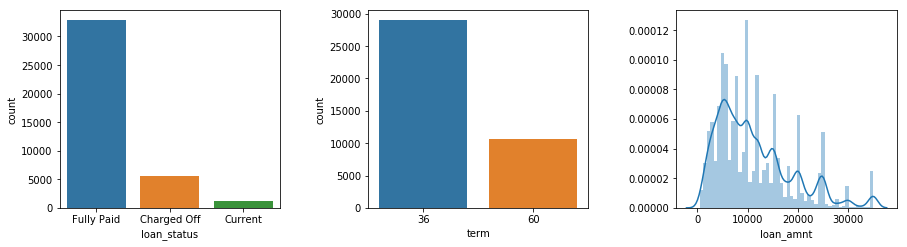

In [73]:
fig, ax = plt.pyplot.subplots(figsize=(15, 8))
fig.subplots_adjust(wspace=0.40)
plt.pyplot.subplot(2,3,1)
sns.countplot(loan.loan_status)
plt.pyplot.subplot(2,3,2)
sns.countplot(loan.term)
plt.pyplot.subplot(2,3,3)
sns.distplot(loan.loan_amnt)

In [66]:
loan.member_id.count(), loan.member_id.unique().size, loan.emp_title.unique().size

(39717, 39717, 28821)